## <center>Simple 2-state analysis with RMSD-based transition interfaces</center>

##### MUST SHARE KERNEL WITH NOTEBOOK `00-load-data.ipynb`

#### PLOT Chunks of traj to Calibrate `min_residence` parameter
--------------

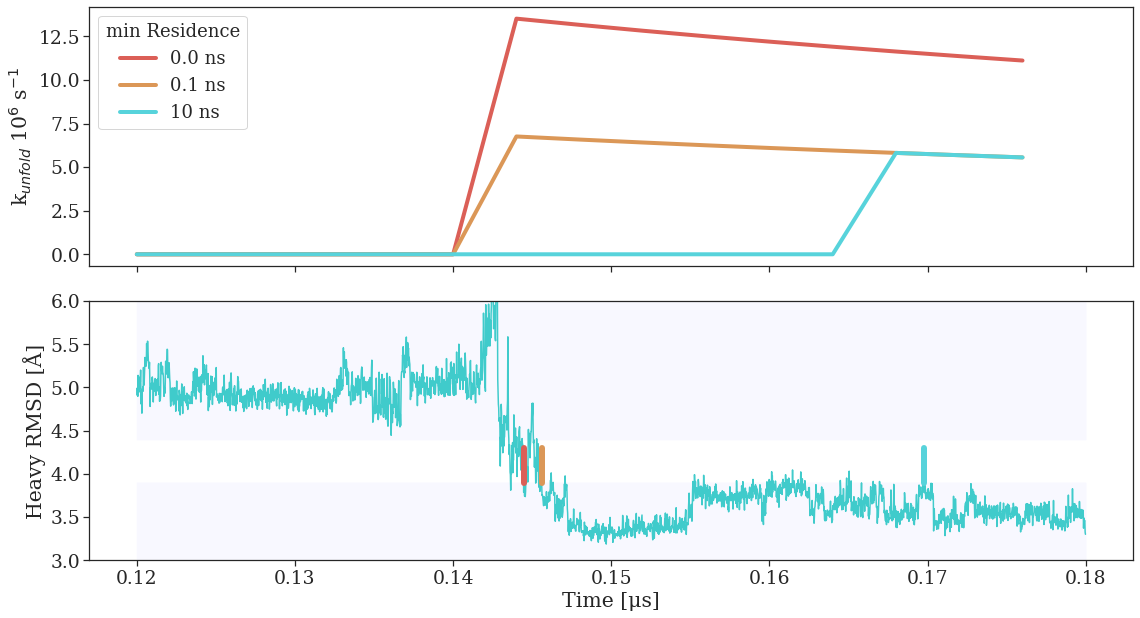

In [29]:
plt.close()
#plt.figure(figsize=(16,5))
fig, axes = plt.subplots(2,1,figsize=(16,9), sharex=True)

colorcycle = seaborn.color_palette("hls", 14)
interfaces    = ifcs_2state_1

# Track the ones we will show for later
lastsum = -1
showthese = list()
for i,key in enumerate(longtraj_2states):
    _sum = np.sum(observed_rates[key]["backwards"][:n_frames//incr_length])
    if not _sum:
        continue
    elif abs(_sum - lastsum) < 1e-4:
        continue
    else:
        showthese.append((i,key))
        lastsum = _sum
    seaborn.lineplot(
        x=observed_rates[label_timesteps][label_longtraj][i_frame//incr_length:n_frames//incr_length],
        y=observed_rates[key]["backwards"][i_frame//incr_length:n_frames//incr_length],
        # Hidden residence time calculation depends on
        # timestep, 20 picoseconds for OpenMM
        label="%.1f ns" % (
            0.02 * int(splitsteps(key))
        ) if int(splitsteps(key)) < 49
        else "%d ns" % (
            0.02 * int(splitsteps(key))
        ),
        linewidth=4,
        ax=axes[0],
        color=colorcycle[i],
    )
legend = axes[0].legend(fontsize='18', title="min Residence")
legend.get_title().set_fontsize('18')

axes[0].set_ylabel("k$_{unfold}$ 10$^6$ s$^{-1}$")

# Timeseries Values
seaborn.lineplot(
    x=traj_rmsd_df[label_timesteps][i_frame:n_frames],
    y=traj_rmsd_df[label_heavies][i_frame:n_frames],
    color=timeseriescolor,
    ax=axes[1]
)

_interfaces = [shading_min] + interfaces + [shading_max]
#   - transition interface locations
for i in range(len(_interfaces)//2):
    axes[1].fill_between(
        traj_rmsd_df[label_timesteps][i_frame:n_frames],
        _interfaces[2*i],
        _interfaces[2*i+1],
        color=interfacecolor,
    )

# Extra plot objects:
#   - only looking at first transition into folded
for lookatme in showthese:
    i,lookatme = lookatme
    t = transition_data[lookatme][0][1][0][0]
    axes[1].plot(
        [_index_to_time(t), _index_to_time(t)],
        [interfaces[0] + arrow_length, interfaces[0]],
        color=colorcycle[i],
        linewidth=arrow_linewidth,
    )
    _t = _transition_data[lookatme][0][1][0][0]
#    axes[1].plot(
 #       [_index_to_time(_t), _index_to_time(_t)],
  #      [interfaces[0] + arrow_length, interfaces[0]],
   #     color=colorcycle[-i],
     #   linewidth=arrow_linewidth,
    #)

axes[1].set_ylim(3,6)
fig.tight_layout()
plt.savefig(analysis_directory / "rmsd-Calpha-changecount-calibration-2panel.png", dpi=1200)

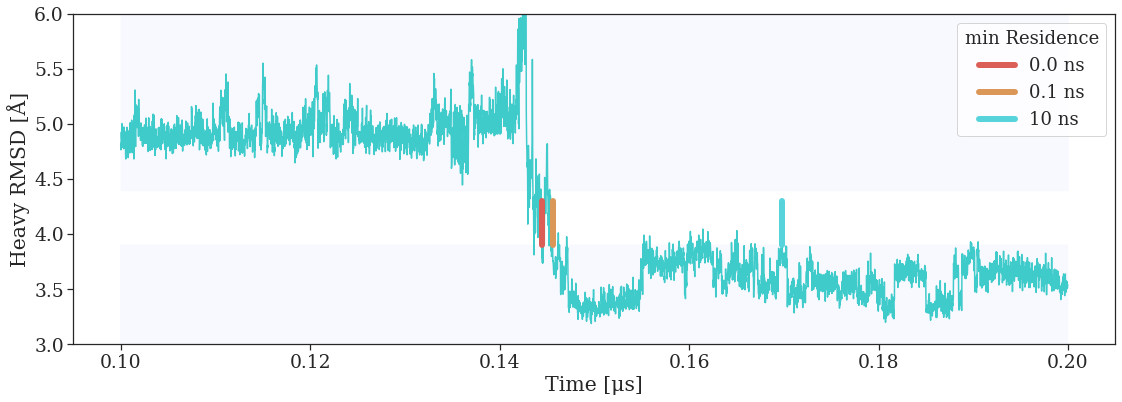

In [30]:
plt.close()
#plt.figure(figsize=(16,5))
fig, ax = plt.subplots(1,1,figsize=(16,6))

colorcycle = seaborn.color_palette("hls", 14)
interfaces    = ifcs_2state_1

# This stuff makes complicated plot...
# Values to help with extra plot objects
i_frame         = 5000
n_frames        = 10000
interfacecolor  = "ghostwhite"
timeseriescolor = [r+s for r,s in zip(matplotlib.colors.to_rgba("darkcyan"), (0.25, 0.25, 0.25, 0))]
shading_min     = 0.2
shading_max     = 8
arrow_linewidth = 6
arrow_length    = 0.4

# Track the ones we will show for later
lastsum = -1
showthese = list()
for i,key in enumerate(longtraj_2states):
    _sum = np.sum(observed_rates[key]["backwards"][i_frame//incr_length:n_frames//incr_length])
    if not _sum:
        continue
    elif abs(_sum - lastsum) < 1e-4:
        continue
    else:
        showthese.append((i,key))
        lastsum = _sum

# Timeseries Values
seaborn.lineplot(
    x=traj_rmsd_df[label_timesteps][i_frame:n_frames],
    y=traj_rmsd_df[label_heavies][i_frame:n_frames],
    color=timeseriescolor,
    ax=ax
)

_interfaces = [shading_min] + interfaces + [shading_max]
#   - transition interface locations
for i in range(len(_interfaces)//2):
    ax.fill_between(
        traj_rmsd_df[label_timesteps][i_frame:n_frames],
        _interfaces[2*i],
        _interfaces[2*i+1],
        color=interfacecolor,
    )

# Extra plot objects:
#   - only looking at first transition into folded
for lookatme in showthese:
    i,lookatme = lookatme
    t = _relevant_transitions(transition_data[lookatme][0][1][0], i_frame, n_frames)[0]
    ax.plot(
        [_index_to_time(t), _index_to_time(t)],
        [interfaces[0] + arrow_length, interfaces[0]],
        color=colorcycle[i],
        linewidth=arrow_linewidth,
        label="%.1f ns" % (
            0.02 * int(splitsteps(lookatme))
        ) if int(splitsteps(lookatme)) < 49
        else "%d ns" % (
            0.02 * int(splitsteps(lookatme))
        ),
    )

legend = ax.legend(fontsize='18', title="min Residence")
legend.get_title().set_fontsize('18')

ax.set_ylim(3,6)
fig.tight_layout()
plt.savefig(analysis_directory / "rmsd-Calpha-changecount-calibration.png", dpi=1200)

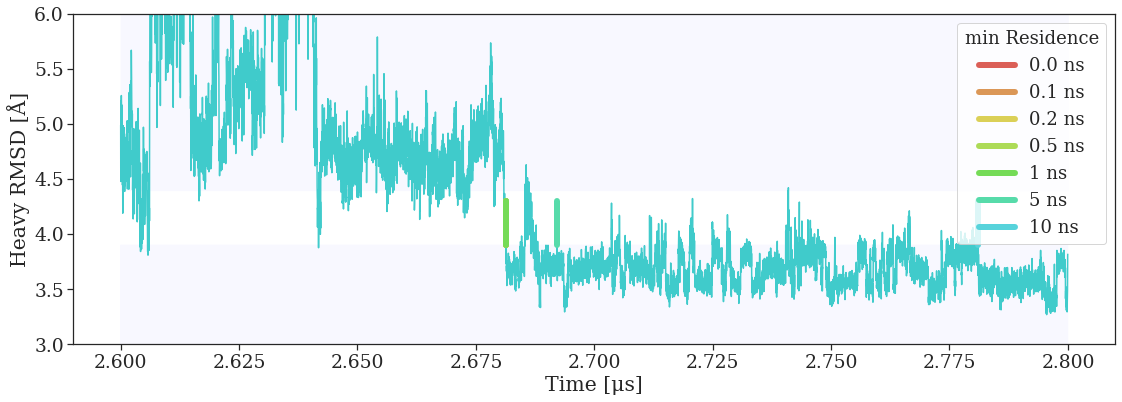

In [31]:
plt.close()
#plt.figure(figsize=(16,5))
fig, ax = plt.subplots(1,1,figsize=(16,6))

colorcycle = seaborn.color_palette("hls", 14)
interfaces    = ifcs_2state_1

# This stuff makes complicated plot...
# Values to help with extra plot objects
i_frame         = 130000
n_frames        = 140000
interfacecolor  = "ghostwhite"
timeseriescolor = [r+s for r,s in zip(matplotlib.colors.to_rgba("darkcyan"), (0.25, 0.25, 0.25, 0))]
shading_min     = 0.2
shading_max     = 8
arrow_linewidth = 6
arrow_length    = 0.4

# Track the ones we will show for later
lastsum = -1
showthese = list()
for i,key in enumerate(longtraj_2states):
    _sum = np.sum(observed_rates[key]["backwards"][i_frame//incr_length:n_frames//incr_length])
    if not _sum:
        continue
    elif abs(_sum - lastsum) < 1e-4:
        continue
    else:
        showthese.append((i,key))
        lastsum = _sum

# Timeseries Values
seaborn.lineplot(
    x=traj_rmsd_df[label_timesteps][i_frame:n_frames],
    y=traj_rmsd_df[label_heavies][i_frame:n_frames],
    color=timeseriescolor,
    ax=ax
)

_interfaces = [shading_min] + interfaces + [shading_max]
#   - transition interface locations
for i in range(len(_interfaces)//2):
    ax.fill_between(
        traj_rmsd_df[label_timesteps][i_frame:n_frames],
        _interfaces[2*i],
        _interfaces[2*i+1],
        color=interfacecolor,
    )

# Extra plot objects:
#   - only looking at first transition into folded
for lookatme in showthese:
    i,lookatme = lookatme
    t = _relevant_transitions(transition_data[lookatme][0][1][0], i_frame, n_frames)
    if t:
        t = t[0]
    else:
        continue
    ax.plot(
        [_index_to_time(t), _index_to_time(t)],
        [interfaces[0] + arrow_length, interfaces[0]],
        color=colorcycle[i],
        linewidth=arrow_linewidth,
        label="%.1f ns" % (
            0.02 * int(splitsteps(lookatme))
        ) if int(splitsteps(lookatme)) < 49
        else "%d ns" % (
            0.02 * int(splitsteps(lookatme))
        ),
    )

legend = ax.legend(fontsize='18', title="min Residence")
legend.get_title().set_fontsize('18')

ax.set_ylim(3,6)
fig.tight_layout()
plt.savefig(analysis_directory / "rmsd-Calpha-changecount-calibration-again.png", dpi=1200)

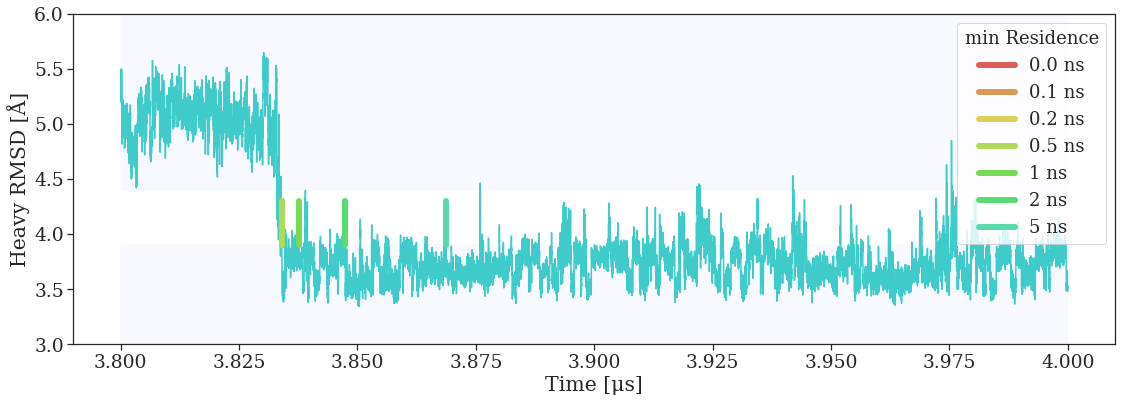

In [32]:
plt.close()
#plt.figure(figsize=(16,5))
fig, ax = plt.subplots(1,1,figsize=(16,6))

colorcycle = seaborn.color_palette("hls", 14)
interfaces    = ifcs_2state_1

# This stuff makes complicated plot...
# Values to help with extra plot objects
i_frame         = 190000
n_frames        = 200000
interfacecolor  = "ghostwhite"
timeseriescolor = [r+s for r,s in zip(matplotlib.colors.to_rgba("darkcyan"), (0.25, 0.25, 0.25, 0))]
shading_min     = 0.2
shading_max     = 8
arrow_linewidth = 6
arrow_length    = 0.4

# Track the ones we will show for later
lastsum = -1
showthese = list()
for i,key in enumerate(longtraj_2states):
    _sum = np.sum(observed_rates[key]["backwards"][i_frame//incr_length:n_frames//incr_length])
    if not _sum:
        continue
    elif abs(_sum - lastsum) < 1e-4:
        continue
    else:
        showthese.append((i,key))
        lastsum = _sum

# Timeseries Values
seaborn.lineplot(
    x=traj_rmsd_df[label_timesteps][i_frame:n_frames],
    y=traj_rmsd_df[label_heavies][i_frame:n_frames],
    color=timeseriescolor,
    ax=ax
)

_interfaces = [shading_min] + interfaces + [shading_max]
#   - transition interface locations
for i in range(len(_interfaces)//2):
    ax.fill_between(
        traj_rmsd_df[label_timesteps][i_frame:n_frames],
        _interfaces[2*i],
        _interfaces[2*i+1],
        color=interfacecolor,
    )

# Extra plot objects:
#   - only looking at first transition into folded
for lookatme in showthese:
    i,lookatme = lookatme
    t = _relevant_transitions(transition_data[lookatme][0][1][0], i_frame, n_frames)
    if t:
        t = t[0]
    else:
        continue
    ax.plot(
        [_index_to_time(t), _index_to_time(t)],
        [interfaces[0] + arrow_length, interfaces[0]],
        color=colorcycle[i],
        linewidth=arrow_linewidth,
        label="%.1f ns" % (
            0.02 * int(splitsteps(lookatme))
        ) if int(splitsteps(lookatme)) < 49
        else "%d ns" % (
            0.02 * int(splitsteps(lookatme))
        ),
    )

legend = ax.legend(fontsize='18', title="min Residence")
legend.get_title().set_fontsize('18')

ax.set_ylim(3,6)
fig.tight_layout()
plt.savefig(analysis_directory / "rmsd-Calpha-changecount-calibration-doublegain.png", dpi=1200)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


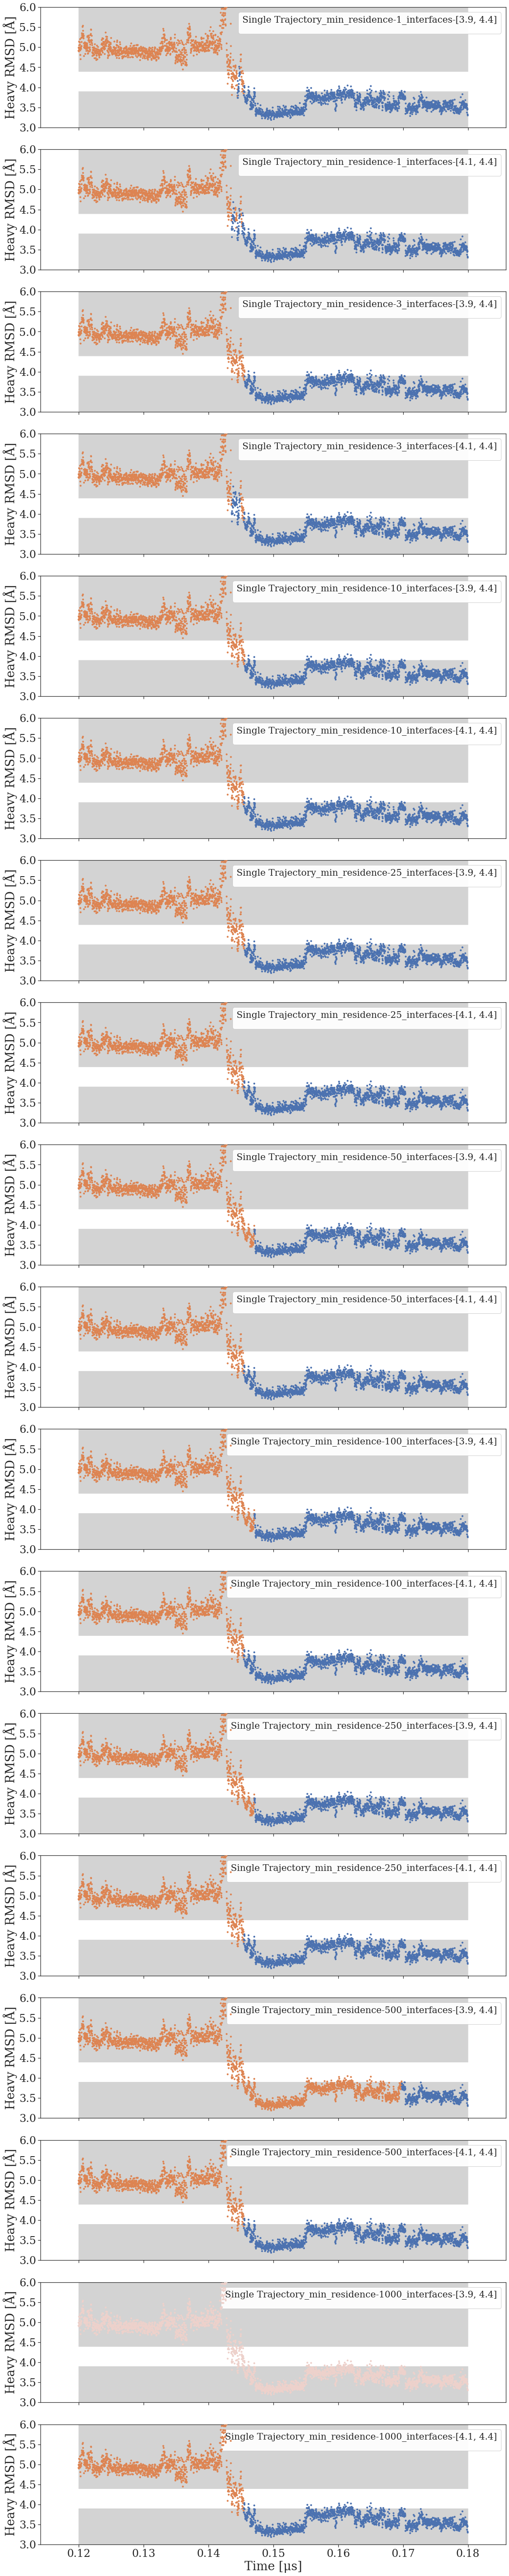

In [33]:
i_frame  = 6000
n_frames = 9000
interfacecolor  = "lightgrey"

#------================================------#
#----- PLOT RMSD Scatter Color by State -----#
#------================================------#
plt.close()
fig, axes = plt.subplots(len(the_dtrajs),1,figsize=(16,4.5*len(the_dtrajs)), sharex=True)
plt.xlabel(label_timesteps)

# Timeseries Values
for i,parkey in enumerate(the_dtrajs):
    seaborn.scatterplot(
        x=traj_rmsd_df[label_timesteps][i_frame:n_frames],
        y=traj_rmsd_df[label_heavies][i_frame:n_frames],
        #color=timeseriescolor,
        hue=the_dtrajs[parkey][i_frame:n_frames],
        ax=axes[i],
        zorder=10,
        linewidth=0,
        legend=False,
        size=3,
    )
    axes[i].legend(title=parkey, fontsize=22, framealpha=0.95)
    axes[i].yaxis.label.set_fontsize(27)
    for tick in axes[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(24)

    # Show Transition interface locations
    _interfaces = [shading_min] + ifcs_2state_1 + [shading_max]
    for j in range(len(_interfaces)//2):
        axes[i].fill_between(
            traj_rmsd_df[label_timesteps][i_frame:n_frames],
            _interfaces[2*j],
            _interfaces[2*j+1],
            color=interfacecolor,
        )

    axes[i].set_ylim(3, 6)

axes[-1].xaxis.label.set_fontsize(27)

#ax.get_xticklabels().set_fontsize(22)
#ax.get_yticklabels().set_fontsize(22)

for tick in axes[-1].xaxis.get_major_ticks():
    tick.label.set_fontsize(24)

fig.tight_layout()
plt.savefig(analysis_directory / "rmsd-2states-1.png", dpi=300)

In [ ]:
i_frame  = 120000
n_frames = 140000
interfacecolor  = "lightgrey"

#------================================------#
#----- PLOT RMSD Scatter Color by State -----#
#------================================------#
plt.close()
fig, axes = plt.subplots(len(the_dtrajs),1,figsize=(16,4.5*len(the_dtrajs)), sharex=True)
plt.xlabel(label_timesteps)

# Timeseries Values
for i,parkey in enumerate(the_dtrajs):
    seaborn.scatterplot(
        x=traj_rmsd_df[label_timesteps][i_frame:n_frames],
        y=traj_rmsd_df[label_heavies][i_frame:n_frames],
        #color=timeseriescolor,
        hue=the_dtrajs[parkey][i_frame:n_frames],
        ax=axes[i],
        zorder=10,
        linewidth=0,
        legend=False,
        size=3,
    )
    axes[i].legend(title=parkey, fontsize=22, framealpha=0.95)
    axes[i].yaxis.label.set_fontsize(27)
    for tick in axes[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(24)

    # Show Transition interface locations
    _interfaces = [shading_min] + ifcs_2state_1 + [shading_max]
    for j in range(len(_interfaces)//2):
        axes[i].fill_between(
            traj_rmsd_df[label_timesteps][i_frame:n_frames],
            _interfaces[2*j],
            _interfaces[2*j+1],
            color=interfacecolor,
        )

    axes[i].set_ylim(3, 6)

axes[-1].xaxis.label.set_fontsize(27)

#ax.get_xticklabels().set_fontsize(22)
#ax.get_yticklabels().set_fontsize(22)

for tick in axes[-1].xaxis.get_major_ticks():
    tick.label.set_fontsize(24)

fig.tight_layout()
plt.savefig(analysis_directory / "rmsd-2states-2.png", dpi=300)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [ ]:
i_frame  = 300000
n_frames = 375000
interfacecolor  = "lightgrey"

#------================================------#
#----- PLOT RMSD Scatter Color by State -----#
#------================================------#
plt.close()
fig, axes = plt.subplots(len(the_dtrajs),1,figsize=(16,4.5*len(the_dtrajs)), sharex=True)
plt.xlabel(label_timesteps)

# Timeseries Values
for i,parkey in enumerate(the_dtrajs):
    seaborn.scatterplot(
        x=traj_rmsd_df[label_timesteps][i_frame:n_frames],
        y=traj_rmsd_df[label_heavies][i_frame:n_frames],
        #color=timeseriescolor,
        hue=the_dtrajs[parkey][i_frame:n_frames],
        ax=axes[i],
        zorder=10,
        linewidth=0,
        legend=False,
        size=3,
    )
    axes[i].legend(title=parkey, fontsize=22, framealpha=0.95)
    axes[i].yaxis.label.set_fontsize(27)
    for tick in axes[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(24)

    # Show Transition interface locations
    _interfaces = [shading_min] + ifcs_2state_1 + [shading_max]
    for j in range(len(_interfaces)//2):
        axes[i].fill_between(
            traj_rmsd_df[label_timesteps][i_frame:n_frames],
            _interfaces[2*j],
            _interfaces[2*j+1],
            color=interfacecolor,
        )

    axes[i].set_ylim(3, 6)

axes[-1].xaxis.label.set_fontsize(27)

#ax.get_xticklabels().set_fontsize(22)
#ax.get_yticklabels().set_fontsize(22)

for tick in axes[-1].xaxis.get_major_ticks():
    tick.label.set_fontsize(24)

fig.tight_layout()
plt.savefig(analysis_directory / "rmsd-2states-3.png", dpi=300)

In [ ]:
i_frame  = 380000
n_frames = 480000
interfacecolor  = "lightgrey"

#------================================------#
#----- PLOT RMSD Scatter Color by State -----#
#------================================------#
plt.close()
fig, axes = plt.subplots(len(the_dtrajs),1,figsize=(16,4.5*len(the_dtrajs)), sharex=True)
plt.xlabel(label_timesteps)

# Timeseries Values
for i,parkey in enumerate(the_dtrajs):
    seaborn.scatterplot(
        x=traj_rmsd_df[label_timesteps][i_frame:n_frames],
        y=traj_rmsd_df[label_heavies][i_frame:n_frames],
        #color=timeseriescolor,
        hue=the_dtrajs[parkey][i_frame:n_frames],
        ax=axes[i],
        zorder=10,
        linewidth=0,
        legend=False,
        size=3,
    )
    axes[i].legend(title=parkey, fontsize=22, framealpha=0.95)
    axes[i].yaxis.label.set_fontsize(27)
    for tick in axes[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(24)

    # Show Transition interface locations
    _interfaces = [shading_min] + ifcs_2state_1 + [shading_max]
    for j in range(len(_interfaces)//2):
        axes[i].fill_between(
            traj_rmsd_df[label_timesteps][i_frame:n_frames],
            _interfaces[2*j],
            _interfaces[2*j+1],
            color=interfacecolor,
        )

    axes[i].set_ylim(3, 6)

axes[-1].xaxis.label.set_fontsize(27)

#ax.get_xticklabels().set_fontsize(22)
#ax.get_yticklabels().set_fontsize(22)

for tick in axes[-1].xaxis.get_major_ticks():
    tick.label.set_fontsize(24)

fig.tight_layout()
plt.savefig(analysis_directory / "rmsd-2states-4.png", dpi=300)

In [ ]:
i_frame  = 520000
n_frames = 620000
interfacecolor  = "lightgrey"

#------================================------#
#----- PLOT RMSD Scatter Color by State -----#
#------================================------#
plt.close()
fig, axes = plt.subplots(len(the_dtrajs),1,figsize=(16,4.5*len(the_dtrajs)), sharex=True)
plt.xlabel(label_timesteps)

# Timeseries Values
for i,parkey in enumerate(the_dtrajs):
    seaborn.scatterplot(
        x=traj_rmsd_df[label_timesteps][i_frame:n_frames],
        y=traj_rmsd_df[label_heavies][i_frame:n_frames],
        #color=timeseriescolor,
        hue=the_dtrajs[parkey][i_frame:n_frames],
        ax=axes[i],
        zorder=10,
        linewidth=0,
        legend=False,
        size=3,
    )
    axes[i].legend(title=parkey, fontsize=22, framealpha=0.95)
    axes[i].yaxis.label.set_fontsize(27)
    for tick in axes[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(24)

    # Show Transition interface locations
    _interfaces = [shading_min] + ifcs_2state_1 + [shading_max]
    for j in range(len(_interfaces)//2):
        axes[i].fill_between(
            traj_rmsd_df[label_timesteps][i_frame:n_frames:10],
            _interfaces[2*j],
            _interfaces[2*j+1],
            color=interfacecolor,
        )

    axes[i].set_ylim(3, 6)

axes[-1].xaxis.label.set_fontsize(27)

#ax.get_xticklabels().set_fontsize(22)
#ax.get_yticklabels().set_fontsize(22)

for tick in axes[-1].xaxis.get_major_ticks():
    tick.label.set_fontsize(24)

fig.tight_layout()
plt.savefig(analysis_directory / "rmsd-2states-5.png", dpi=300)

In [ ]:
i_frame  = 0
n_frames = -1
interfacecolor  = "lightgrey"

#------================================------#
#----- PLOT RMSD Scatter Color by State -----#
#------================================------#
plt.close()
fig, axes = plt.subplots(len(the_dtrajs),1,figsize=(16,4.5*len(the_dtrajs)), sharex=True)
plt.xlabel(label_timesteps)

# Timeseries Values
for i,parkey in enumerate(the_dtrajs):
    seaborn.scatterplot(
        x=traj_rmsd_df[label_timesteps][i_frame:n_frames:10],
        y=traj_rmsd_df[label_heavies][i_frame:n_frames:10],
        #color=timeseriescolor,
        hue=the_dtrajs[parkey][i_frame:n_frames:10],
        ax=axes[i],
        zorder=10,
        linewidth=0,
        legend=False,
        size=3,
    )
    axes[i].legend(title=parkey, fontsize=22, framealpha=0.95)
    axes[i].yaxis.label.set_fontsize(27)
    for tick in axes[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(24)

    # Show Transition interface locations
    _interfaces = [shading_min] + ifcs_2state_1 + [shading_max]
    for j in range(len(_interfaces)//2):
        axes[i].fill_between(
            traj_rmsd_df[label_timesteps][i_frame:n_frames:10],
            _interfaces[2*j],
            _interfaces[2*j+1],
            color=interfacecolor,
        )

    axes[i].set_ylim(3, 6)

axes[-1].xaxis.label.set_fontsize(27)

#ax.get_xticklabels().set_fontsize(22)
#ax.get_yticklabels().set_fontsize(22)

for tick in axes[-1].xaxis.get_major_ticks():
    tick.label.set_fontsize(24)

fig.tight_layout()
plt.savefig(analysis_directory / "rmsd-2states-6.png", dpi=300)